# K Nearest Neighbor Algorithm From Scratch

In [3]:
# Importing the libraries
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [5]:
iris = datasets.load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [8]:
X_train.shape, y_train.shape

((120, 4), (120,))

In [7]:
X_train[0]

array([5.1, 2.5, 3. , 1.1])

In [9]:
y_train

array([1, 2, 0, 2, 1, 0, 0, 0, 0, 1, 0, 1, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2,
       2, 1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 2, 0, 0, 0, 2, 1, 2, 2, 1, 0, 2,
       0, 2, 0, 1, 1, 0, 1, 0, 2, 2, 2, 1, 0, 0, 2, 1, 1, 0, 1, 2, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 2, 1, 2, 2, 1, 0, 1, 2, 0, 0, 2, 2, 1, 1, 2,
       0, 1, 2, 2, 2, 1, 0, 0, 0, 0, 2, 1, 2, 0, 0, 1, 1, 2, 1, 1, 2, 2,
       2, 0, 2, 0, 0, 2, 2, 1, 0, 0])

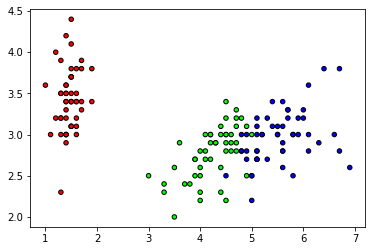

In [11]:
plt.figure()
plt.scatter(X[:, 2], X[:, 1], c=y, cmap=cmap, edgecolor='k', s=20)
plt.show()

In [17]:
a = [1, 1, 1, 2, 2, 4, 5, 6]
from collections import Counter
most_common = Counter(a).most_common(2)
print(most_common[0][0])

1


In [22]:
from collections import Counter

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    def predict(self, X):
        predicted_labels = [self._predict(x) for x in X]
        return np.array(predicted_labels)

    def _predict(self, x):
        # Compute distances
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # get k nearest samples, labels
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # majority vote, most common class label
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

In [24]:
clf = KNN(k=5)

clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

accuracy = np.sum(predictions == y_test) / len(y_test)

print(accuracy)

0.9666666666666667
